<a href="https://colab.research.google.com/github/changdaeoh/HandsOn_DL/blob/main/sub_materials/4_RNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Tokenization & Embedding

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical


texts = ["You are the Best", "You are the Nice"]

tokenizer = Tokenizer(num_words = 10, oov_token = "<OOV>")
tokenizer.fit_on_texts(texts)

# text -> integer
sequences = tokenizer.texts_to_sequences(texts)

# integer -> binary encoding
binary_results = tokenizer.sequences_to_matrix(sequences, mode = "binary")

print(tokenizer.word_index)
print("----------------------")
print(f"sequences : {sequences}\n")
print(f"binary_vectors : \n{binary_results}\n")
# integer -> one-hot encoding
print('one-hot : \n',to_categorical(sequences))

test_text = ['You are the One']
test_seq = tokenizer.texts_to_sequences(test_text)

print(f'\ntest sequences : {test_seq}')

{'<OOV>': 1, 'you': 2, 'are': 3, 'the': 4, 'best': 5, 'nice': 6}
----------------------
sequences : [[2, 3, 4, 5], [2, 3, 4, 6]]

binary_vectors : 
[[0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 1. 0. 0. 0.]]

one-hot : 
 [[[0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]]

 [[0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]

test sequences : [[2, 3, 4, 1]]


In [ ]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print(X_train[0])
print('---------')
print(y_train[0])

(25000,) (25000,)
(25000,) (25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
---------
1


In [ ]:
imdb_get_word_index = {}

for key, value in imdb.get_word_index().items():
    imdb_get_word_index[value] = key
    
for i in range(1, 4):
    print('{} 번째 빈출 단어 = {}'.format(i, imdb_get_word_index[i]))

1 번째 빈출 단어 = the
2 번째 빈출 단어 = and
3 번째 빈출 단어 = a


In [ ]:
# padding을 통해 input될 모든 시퀀스들을 동일길이로 맞춰주기
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

print('Before pad_sequences : ', len(X_train[0]))

pad_X_train = pad_sequences(X_train, maxlen = max_len, padding = 'pre')    # 문장 앞쪽에 패딩추가
pad_X_test = pad_sequences(X_test, maxlen = max_len, padding = "pre")      

print("After pad_sequences : ", len(pad_X_train[0]))

Before pad_sequences :  218
After pad_sequences :  500


In [ ]:
# model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 32,
                    input_length = max_len))
model.add(Flatten())
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam",
              loss = 'binary_crossentropy',
              metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 16001     
Total params: 336,001
Trainable params: 336,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(pad_X_train, y_train, batch_size = 32, epochs = 30,
                    validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 6s 298us/sample - loss: 0.4640 - acc: 0.7743 - val_loss: 0.2920 - val_acc: 0.8806
Epoch 2/30
20000/20000 [==============================] - 5s 267us/sample - loss: 0.1981 - acc: 0.9279 - val_loss: 0.2735 - val_acc: 0.8862
Epoch 3/30
20000/20000 [==============================] - 5s 260us/sample - loss: 0.1041 - acc: 0.9711 - val_loss: 0.2885 - val_acc: 0.8826
Epoch 4/30
20000/20000 [==============================] - 5s 256us/sample - loss: 0.0487 - acc: 0.9917 - val_loss: 0.3158 - val_acc: 0.8808
Epoch 5/30
20000/20000 [==============================] - 5s 261us/sample - loss: 0.0224 - acc: 0.9984 - val_loss: 0.3764 - val_acc: 0.8678
Epoch 6/30
20000/20000 [==============================] - 5s 260us/sample - loss: 0.0114 - acc: 0.9996 - val_loss: 0.3677 - val_acc: 0.8776
Epoch 7/30
20000/20000 [==============================] - 5s 271us/sample - loss: 0.0062 - acc: 0.9998 - val_lo

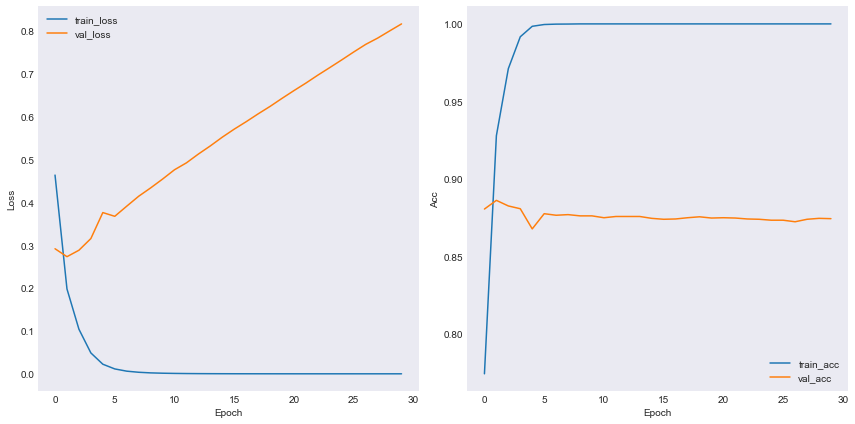

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-dark")

def learning_curve(history):
    hist = history.history
    train_acc, val_acc, train_loss, val_loss =\
        hist["acc"], hist["val_acc"], hist["loss"], hist["val_loss"]

    fig = plt.figure(figsize = (12, 6))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(range(len(train_acc)), train_acc, label = "train_acc")
    ax2.plot(range(len(train_acc)), val_acc, label = "val_acc")
    ax1.plot(range(len(train_acc)), train_loss, label = "train_loss")
    ax1.plot(range(len(train_acc)), val_loss, label = "val_loss")

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Acc')

    ax1.legend()
    ax2.legend()
    plt.tight_layout()
    plt.show()
    
learning_curve(history)

# 2. RNN

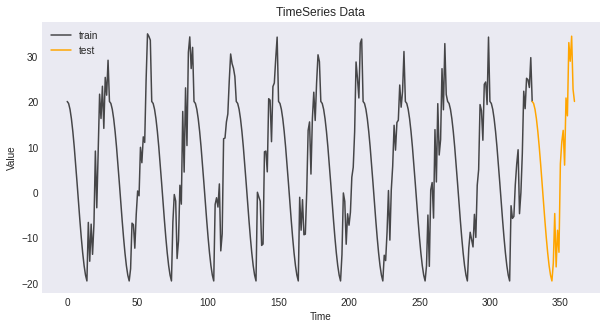

In [12]:
# make sample data
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2020)

time = np.arange(30 * 12 + 1)
month_time = (time % 30) / 30
time_series = 20 * np.where(month_time < 0.5, 
                          np.cos(2 * np.pi * month_time),
                          np.cos(2 * np.pi * month_time) + np.random.random(361))


plt.figure(figsize = (10, 5))
plt.title('TimeSeries Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(np.arange(0, 30 * 11 + 1), time_series[:30 * 11 + 1], color = 'black', alpha = 0.7, label = 'train') # 학습용 데이터
plt.plot(np.arange(30 * 11, 30 * 12 + 1), time_series[30 * 11:], color = 'orange', label = 'test') # 테스트용 데이터
plt.legend()

In [13]:
# 위 시계열 데이터를 rnn에서 처리하기 위한 전처리
def make_sequence(time_series, n):
    x_train, y_train = list(), list()
    
    for i in range(len(time_series)):
        x = time_series[i:(i + n)]
        if (i + n) < len(time_series):
            x_train.append(x)
            y_train.append(time_series[i + n])
        else:
            break
            
    return np.array(x_train), np.array(y_train)


# 과거 10일(timesteps)을 이용하여 1시점 뒤를 예측
n = 10
x_train, y_train = make_sequence(time_series, n)

x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)

from sklearn.model_selection import train_test_split

patial_x_train = x_train[:30 * 11]
patial_y_train = y_train[:30 * 11]
x_test = x_train[30 * 11:]
y_test = y_train[30 * 11:]

print('train:', patial_x_train.shape, patial_y_train.shape) 
print('test:',x_test.shape, y_test.shape)

train: (330, 10, 1) (330, 1)
test: (21, 10, 1) (21, 1)


In [ ]:
# 데이터 형태 확인
test_arr = np.arange(100)
a, b = make_sequence(test_arr, 10)

for i in range(1, 4):
    print(a[i],'|', b[i])

[ 1  2  3  4  5  6  7  8  9 10] | 11
[ 2  3  4  5  6  7  8  9 10 11] | 12
[ 3  4  5  6  7  8  9 10 11 12] | 13


In [ ]:
!pip install graphviz 

In [ ]:
# simple RNN
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model


model = Sequential()
# input_shape(timesteps, features)
# 실제로 모델이 처리하는 input은 (batch_size, timesteps, input_dim) -> embedding layer의 출력과 같은차원
# 모델의 output은 (batch_size, units(output_dim))
model.add(SimpleRNN(units = 32, activation = "tanh", input_shape = (n, 1)))
model.add(Dense(1, activation = "linear"))

model.compile(optimizer = "adam", loss = "mse")
# plot_model(model,'./simpleRNN.png', show_shapes=True)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 32)                1088      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs = 100, batch_size = 12, verbose = 0)

In [ ]:
?np.arange

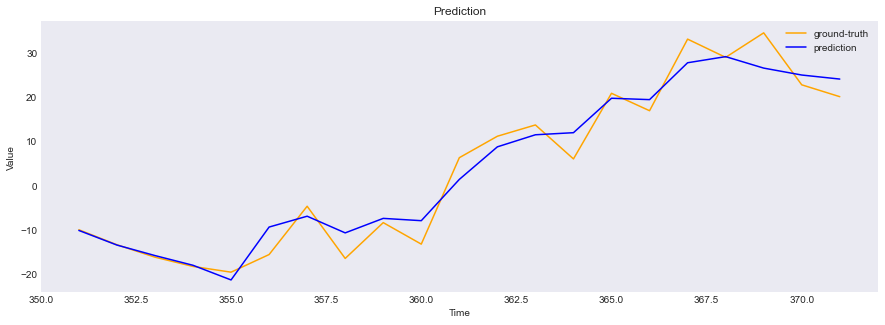

In [ ]:
pred = model.predict(x_test)

# y_train 이후의 index부터 끝까지 시점에 대한 예측
pred_range = np.arange(len(y_train), len(y_train) + len(pred))

plt.figure(figsize=(15,5))
plt.title('Prediction')
plt.xlabel('Time'); plt.ylabel('Value')
plt.plot(pred_range, y_test.reshape(-1), color='orange', label='ground-truth')
plt.plot(pred_range, pred.reshape(-1), color='blue', label='prediction')
plt.legend()
plt.show()

In [ ]:
num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

max_len = 500

pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)

model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim = 32))
# 입력에 대한 dropout, hidden state에 대한 dropout
model.add(SimpleRNN(32, return_sequences = True, dropout = 0.15, recurrent_dropout = 0.15))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

# plot_model(model,'./simpleRNN.png', show_shapes=True)
history = model.fit(pad_X_train, y_train, 
                    batch_size = 32, epochs = 15, 
                    validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/15
20000/20000 [==============================] - 123s 6ms/sample - loss: 0.6982 - acc: 0.5074 - val_loss: 0.6918 - val_acc: 0.5128
Epoch 2/15
20000/20000 [==============================] - 139s 7ms/sample - loss: 0.6807 - acc: 0.5551 - val_loss: 0.5598 - val_acc: 0.7290
Epoch 3/15
20000/20000 [==============================] - 149s 7ms/sample - loss: 0.5531 - acc: 0.7211 - val_loss: 0.4545 - val_acc: 0.7992
Epoch 4/15
20000/20000 [==============================] - 150s 8ms/sample - loss: 0.5056 - acc: 0.7576 - val_loss: 0.5277 - val_acc: 0.7352
Epoch 5/15
20000/20000 [==============================] - 146s 7ms/sample - loss: 0.4626 - acc: 0.7876 - val_loss: 0.4472 - val_acc: 0.8132
Epoch 6/15
20000/20000 [==============================] - 148s 7ms/sample - loss: 0.5602 - acc: 0.7079 - val_loss: 0.5533 - val_acc: 0.7060
Epoch 7/15
20000/20000 [==============================] - 152s 8ms/sample - loss: 0.4073 - acc: 0.8245 - val_lo

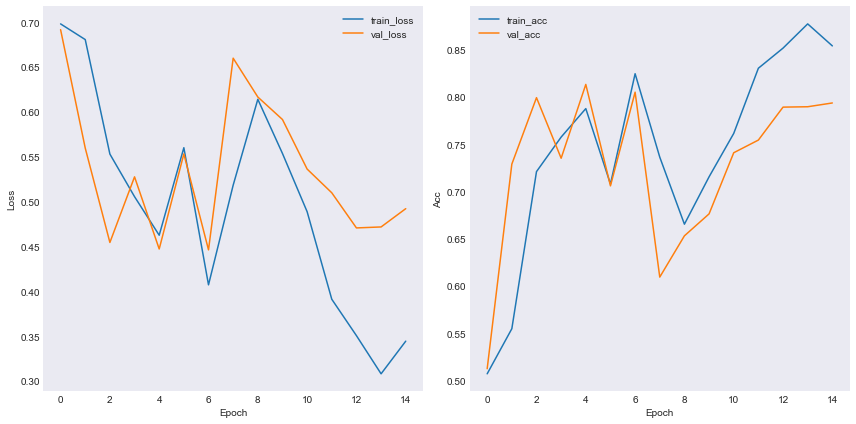

In [ ]:
learning_curve(history)

* 하나의 Embedding layer에 clf head로 logistic regression을 사용한 단순신경망보다 안좋은 성능
* vanilla rnn으로는 최대길이 500의 문장을 제대로 처리할 수 없음.

In [ ]:
model = Sequential()

model.add(Embedding(input_dim = 10000, output_dim = 32, input_length = 500))
model.add(SimpleRNN(32, return_sequences = True))
# model.add(SimpleRNN(32, return_sequences = False))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, 500, 32)           2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()

model.add(Embedding(input_dim = 10000, output_dim = 32, input_length = 500))
# model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = False))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
simple_rnn_13 (SimpleRNN)    (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


# 3. LSTM
길 뚫어놨다. 알아서 이용해라 이것. (residual connection도 마찬가지)
* 핵심 기능 : cell state를 통해 이전 정보를 계속해서 사용하여 gradient 손실방지, 계층적 학습에 도움

In [ ]:
# reuters 로이터 뉴스 토픽 분류 데이터셋
from tensorflow.keras.datasets import reuters

num_words = 10000
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=num_words)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

max_len = 500
pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)
print(len(pad_X_train[0]))

2113536/2110848 [==============================] - 0s 0us/step
(8982,) (8982,)
(2246,) (2246,)
500


In [16]:
from tensorflow.keras.layers import LSTM, Bidirectional

model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 64))
model.add(Bidirectional(LSTM(64, return_sequences = True)))
model.add(Bidirectional(LSTM(64, return_sequences = True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(46, activation = "softmax"))

model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ['acc'])

Train on 7185 samples, validate on 1797 samples
Epoch 1/30
7185/7185 [==============================] - 320s 44ms/sample - loss: 2.4350 - acc: 0.3713 - val_loss: 2.1153 - val_acc: 0.4864
Epoch 2/30
7185/7185 [==============================] - 350s 49ms/sample - loss: 2.0611 - acc: 0.4923 - val_loss: 2.2725 - val_acc: 0.4218
Epoch 3/30
7185/7185 [==============================] - 380s 53ms/sample - loss: 1.9719 - acc: 0.5101 - val_loss: 1.8666 - val_acc: 0.5342
Epoch 4/30
7185/7185 [==============================] - 358s 50ms/sample - loss: 1.7803 - acc: 0.5495 - val_loss: 1.8905 - val_acc: 0.5287
Epoch 5/30
7185/7185 [==============================] - 354s 49ms/sample - loss: 1.6791 - acc: 0.5610 - val_loss: 1.7691 - val_acc: 0.5281
Epoch 6/30
7185/7185 [==============================] - 362s 50ms/sample - loss: 1.6451 - acc: 0.5656 - val_loss: 1.7293 - val_acc: 0.5487
Epoch 7/30
7185/7185 [==============================] - 400s 56ms/sample - loss: 1.6162 - acc: 0.5698 - val_loss: 1.72

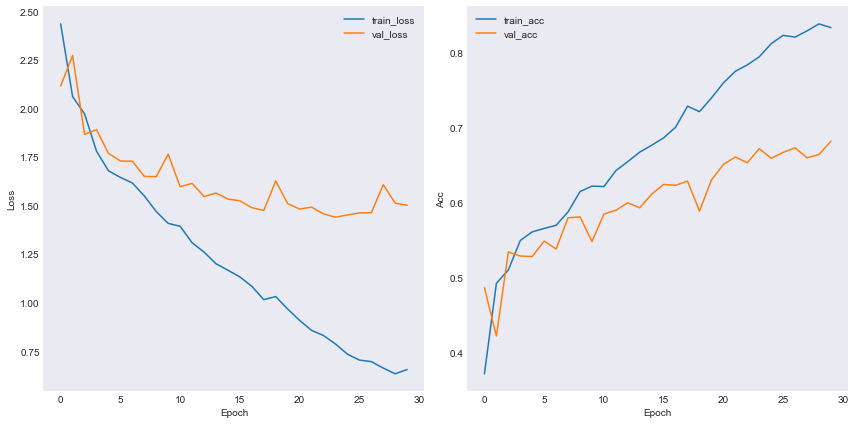

In [ ]:
history = model.fit(pad_X_train, y_train, 
                    batch_size = 32, epochs = 30, 
                    validation_split = 0.2)
learning_curve(history)

# 4. Conv1D

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

max_len = 500
pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

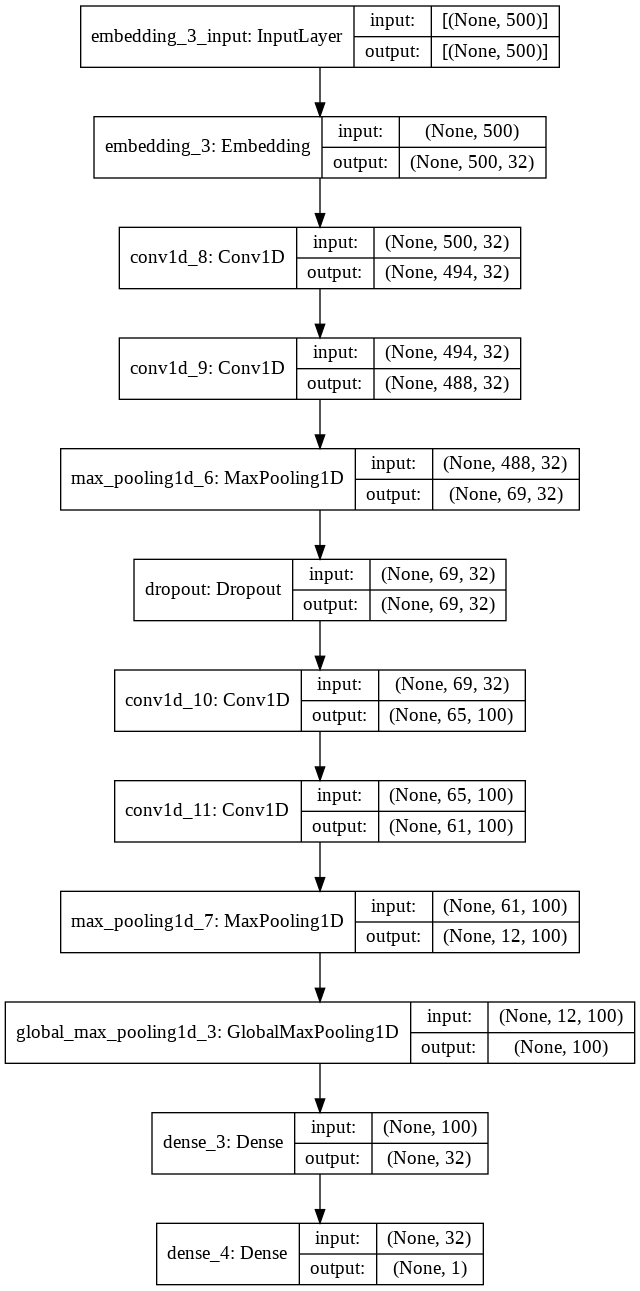

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D
from tensorflow.keras.layers import GlobalMaxPooling1D, Dropout
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 32, input_length = max_len))
model.add(Conv1D(32, 7, activation = "relu"))
model.add(Conv1D(32, 7, activation = "relu"))
model.add(MaxPooling1D(7))
model.add(Dropout(0.2))
model.add(Conv1D(100, 5, activation = "relu"))
model.add(Conv1D(100, 5, activation = "relu"))
model.add(MaxPooling1D(5))
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = "adam",
              loss = 'binary_crossentropy',
              metrics = ['acc'])

plot_model(model,'./conv1d.png', show_shapes=True)
# model.summary()

In [7]:
history = model.fit(pad_X_train, y_train, 
                    batch_size = 32, epochs = 30, 
                    validation_split = 0.2, verbose = 0)

In [9]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-dark")

def learning_curve(history):
    hist = history.history
    train_acc, val_acc, train_loss, val_loss =\
        hist["acc"], hist["val_acc"], hist["loss"], hist["val_loss"]

    fig = plt.figure(figsize = (12, 6))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(range(len(train_acc)), train_acc, label = "train_acc")
    ax2.plot(range(len(train_acc)), val_acc, label = "val_acc")
    ax1.plot(range(len(train_acc)), train_loss, label = "train_loss")
    ax1.plot(range(len(train_acc)), val_loss, label = "val_loss")

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Acc')

    ax1.legend()
    ax2.legend()
    plt.tight_layout()
    plt.show()

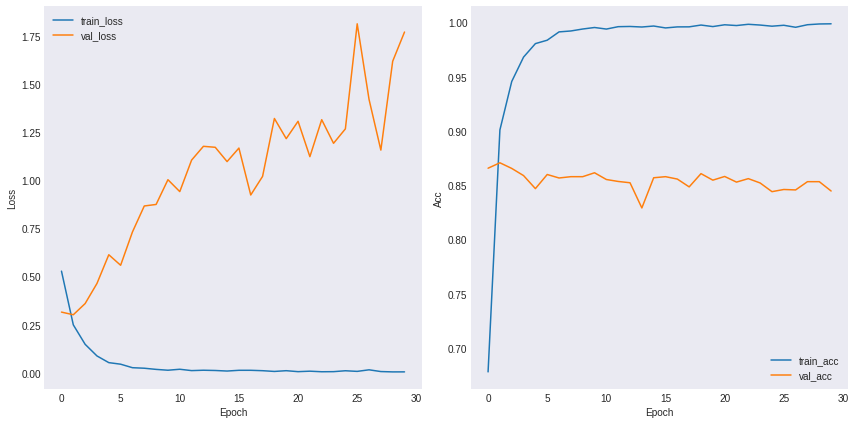

In [10]:
learning_curve(history)

# 5. conv와 lstm 혼합

In [14]:
# cosine dataset
n = 10
x_train, y_train = make_sequence(time_series, n)

x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)

patial_x_train = x_train[:30 * 11]
patial_y_train = y_train[:30 * 11]
x_test = x_train[30 * 11:]
y_test = y_train[30 * 11:]

print('train:', patial_x_train.shape, patial_y_train.shape) 
print('test:',x_test.shape, y_test.shape)

train: (330, 10, 1) (330, 1)
test: (21, 10, 1) (21, 1)


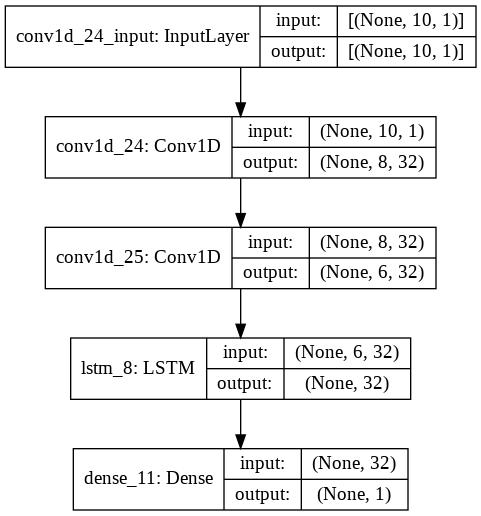

In [33]:
model = Sequential()
model.add(Conv1D(32, 3, activation = 'relu', input_shape = (10, 1)))
model.add(Conv1D(32, 3, activation = 'relu'))

model.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss = 'mse',
             metrics = ['mse'])

plot_model(model, show_shapes=True)

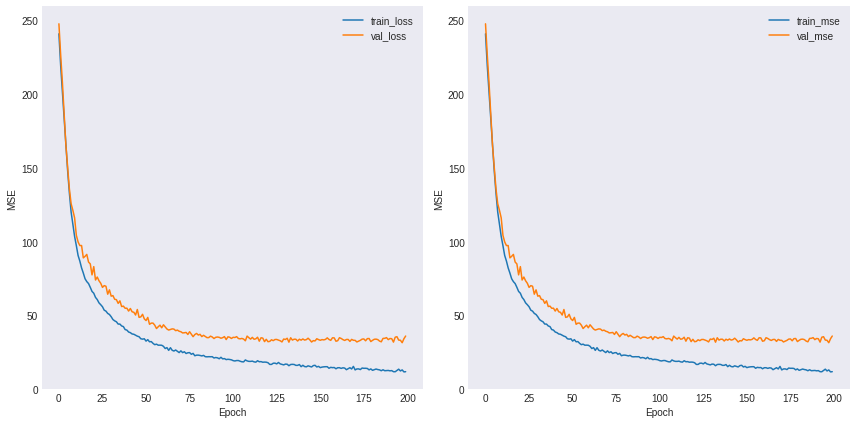

In [34]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 32, 
                    validation_split = 0.2, verbose = 0)
pred = model.predict(x_test)


def learning_curve(history):
    hist = history.history
    train_mse, val_mse, train_loss, val_loss =\
        hist["mse"], hist["val_mse"], hist["loss"], hist["val_loss"]

    fig = plt.figure(figsize = (12, 6))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(range(len(train_mse)), train_mse, label = "train_mse")
    ax2.plot(range(len(train_mse)), val_mse, label = "val_mse")
    ax1.plot(range(len(train_mse)), train_loss, label = "train_loss")
    ax1.plot(range(len(train_mse)), val_loss, label = "val_loss")

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('MSE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('MSE')

    ax1.legend()
    ax2.legend()
    plt.tight_layout()
    plt.show()
learning_curve(history)

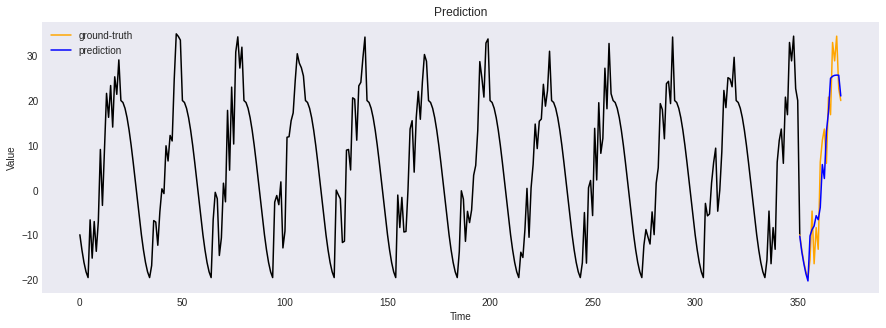

In [35]:
train_range = np.arange(len(x_train) + 1)
pred_range = np.arange(len(y_train), len(y_train) + len(pred))

plt.figure(figsize=(15,5))
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(train_range, np.append(y_train, y_test[0]), color = 'black')
plt.plot(pred_range, y_test, color='orange', label='ground-truth')
plt.plot(pred_range, pred, color='blue', label='prediction')
plt.legend()
plt.show()